# Final Report: Campus Event Scheduling System

Setups and Imports

In [1]:
import sys
import time
import random
import datetime
import matplotlib.pyplot as plt

sys.path.append('src')

from scheduler.event import Event, EventNode
from scheduler.eventlist import EventList
from scheduler.linkedeventlist import LinkedEventList
from scheduler.sort import SortingAlgorithm, sort_data
from scheduler.search import SearchAlgorithm, search_data

Function to Create Dummy events

In [2]:
"""
This function can generate both sorted and unsorted dummy events
"""

def generate_events(n, sort: bool):
    events_data = []
    start_time = datetime.datetime(2025, 1, 1, 9, 0)
    for i in range(n):
        event_time = start_time + datetime.timedelta(hours=i)
        events_data.append({
            "title": f"Event {i}",
            "date": event_time.strftime("%Y-%m-%d"),
            "time": event_time.strftime("%H:%M"),
            "location": f"Location {i}"
        })
    if not sort:
        random.shuffle(events_data)
    return events_data

Part A: Event Storage Structures

For this project, we have implemented two distinct data structures to manage camous events: array-based list (EventList) that mimics a dynamic array, and a LinkedEventList, which acts as singly linked list.

Our EventList is designed to function like a dynamic array, by using standard Python list with fixed-size to mimic array.

TODO: I will finish later.

Part B: Sorting Events

Generating Random Unsorted Dummy Events

In [3]:
size = [50, 500, 5000, 10000]
datasets = {}

for n in size:
    datasets[n] = generate_events(n, sort = False)

Sorting Array-Based-List


--- Testing size: 50 ---
  Insertion Sort took 0.0006 seconds.
  Merge Sort took 0.0002 seconds.
  Quick Sort took 0.0002 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.0297 seconds.
  Merge Sort took 0.0014 seconds.
  Quick Sort took 0.0014 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 1.6736 seconds.
  Merge Sort took 0.0120 seconds.
  Quick Sort took 0.0193 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 6.6166 seconds.
  Merge Sort took 0.0259 seconds.
  Quick Sort took 0.0429 seconds.


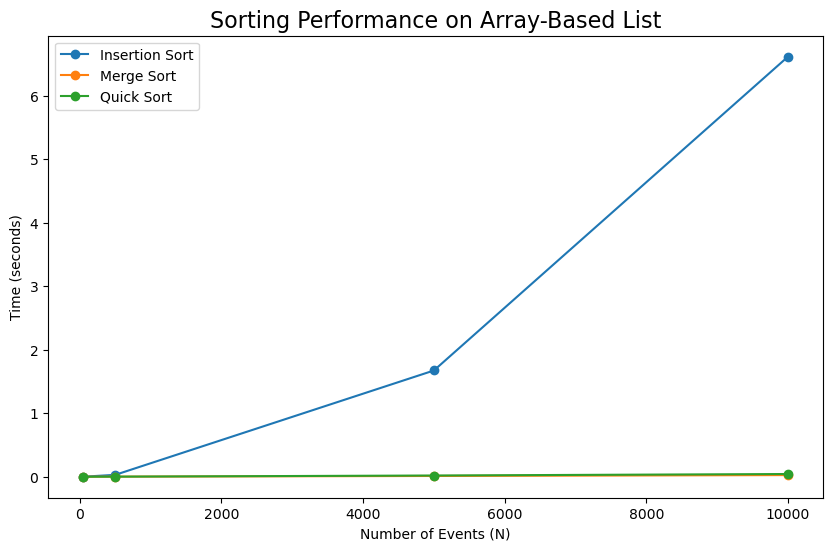

In [ ]:
sorts_to_test = {
    "Insertion Sort": SortingAlgorithm.INSERTION,
    "Merge Sort": SortingAlgorithm.MERGE,
    "Quick Sort": SortingAlgorithm.QUICK
}
array_results = {name: [] for name in sorts_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    
    for sort_name, sort_algo in sorts_to_test.items():
        event_list = EventList()
        for data in event_data:
            event_list.insert(Event(**data))

        start = time.time()
        try:
            sort_data(event_list, algorithm=sort_algo)
            duration = time.time() - start
            array_results[sort_name].append(duration)
            print(f"  {sort_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {sort_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=sort_name)

ax.set_title('Sorting Performance on Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Sorting Linked List


--- Testing size: 50 ---
  Insertion Sort took 0.0140 seconds.
  Merge Sort took 0.0023 seconds.
  Quick Sort took 0.0032 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.7058 seconds.
  Merge Sort took 0.0195 seconds.
  Quick Sort took 0.0558 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 408.5329 seconds.
  Merge Sort took 0.5459 seconds.
  Quick Sort took 5.1309 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 3127.7665 seconds.
  Merge Sort took 1.9207 seconds.
  Quick Sort took 24.2003 seconds.


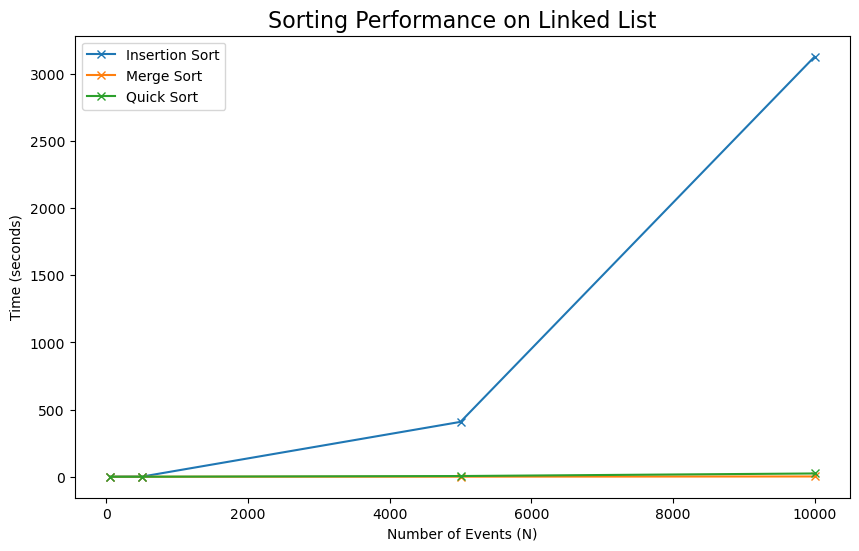

In [5]:
linked_list_results = {name: [] for name in sorts_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    
    for sort_name, sort_algo in sorts_to_test.items():
        # Create a new linked list for each test
        linked_list = LinkedEventList()
        for data in event_data:
            linked_list.insert(EventNode(**data))

        start = time.time()
        try:
            sort_data(linked_list, algorithm=sort_algo)
            duration = time.time() - start
            linked_list_results[sort_name].append(duration)
            print(f"  {sort_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {sort_name} was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in linked_list_results.items():
    completed_sizes = size[:len(timings)]
    ax.plot(completed_sizes, timings, marker='x', label=sort_name)

ax.set_title('Sorting Performance on Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Plotting Performance of Data Structures on Each Sorting Algorithm

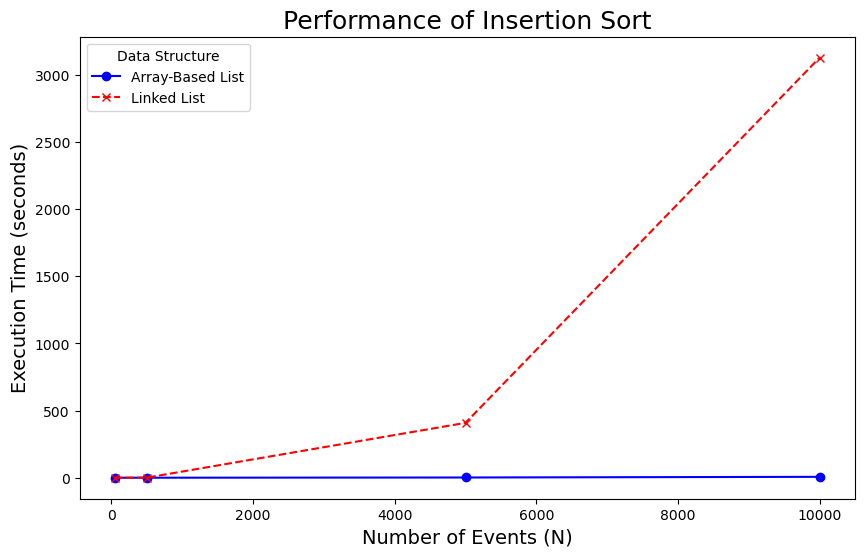

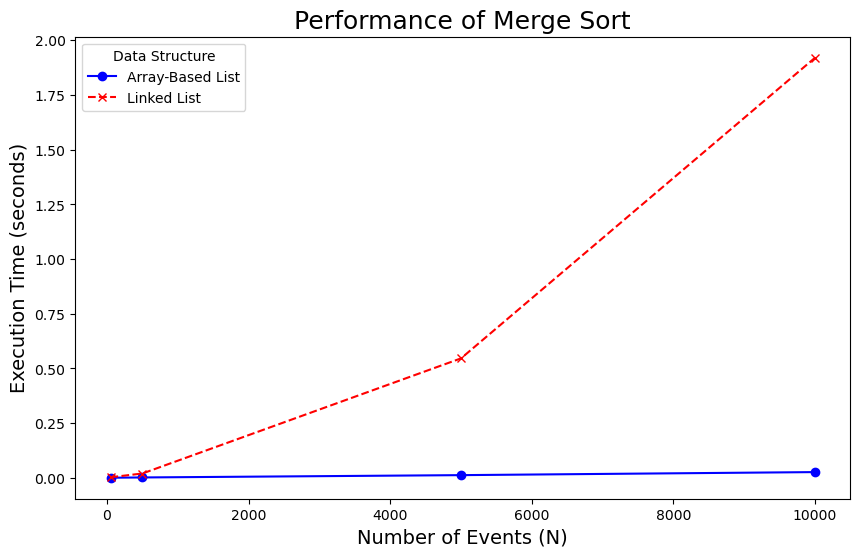

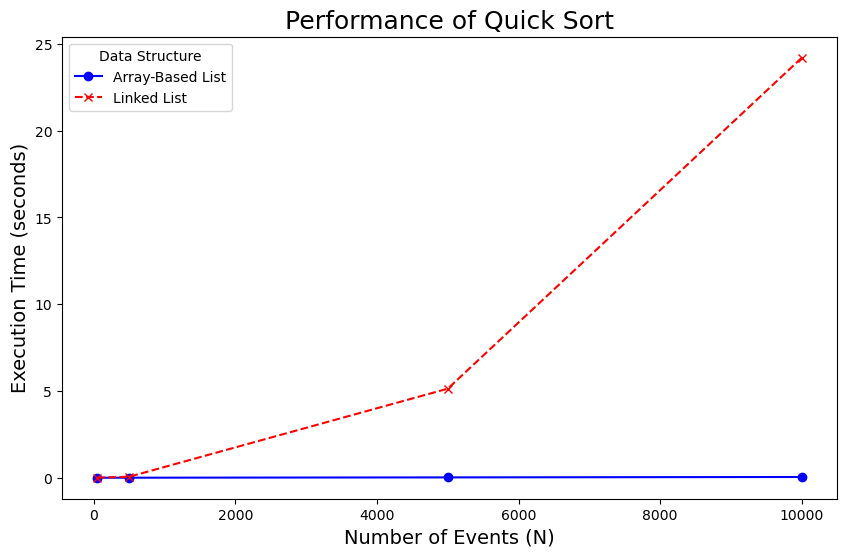

In [6]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Insertion Sort", "Merge Sort", "Quick Sort"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 10000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 10000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo}", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Part C: Analysis of Searching Algorithm

Generating Sorted Dummy Events

In [8]:
size = [50, 500, 5000, 50000, 100000]
datasets = {}
target_id = {}

for n in size:
    datasets[n] = generate_events(n, sort = True)
    target_id[n] = n  #Last element will force both to perform worst-case scenario


Searching in Sorted Array-Based-List

In [ ]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

array_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    event_list = EventList()
    for i, data in enumerate(event_data):
        event = Event(**data)
        event.id = i+1
        event_list.insert(event)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        try:
            search_data(event_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            array_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.6f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Sorted Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()


--- Testing size: 50 ---
  Linear Search took 0.000043 seconds.
  Binary Search took 0.000018 seconds.

--- Testing size: 500 ---
  Linear Search took 0.000066 seconds.
  Binary Search took 0.000007 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.000499 seconds.
  Binary Search took 0.000009 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.005076 seconds.
  Binary Search took 0.000012 seconds.

--- Testing size: 100000 ---


Searching in Sorted Linked List


--- Testing size: 50 ---
  Linear Search took 0.0001 seconds.
  Binary Search took 0.0002 seconds.

--- Testing size: 500 ---
  Linear Search took 0.0003 seconds.
  Binary Search took 0.0001 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.0012 seconds.
  Binary Search took 0.0006 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.0059 seconds.
  Binary Search took 0.0075 seconds.

--- Testing size: 100000 ---
  Linear Search took 0.0773 seconds.
  Binary Search took 0.0157 seconds.


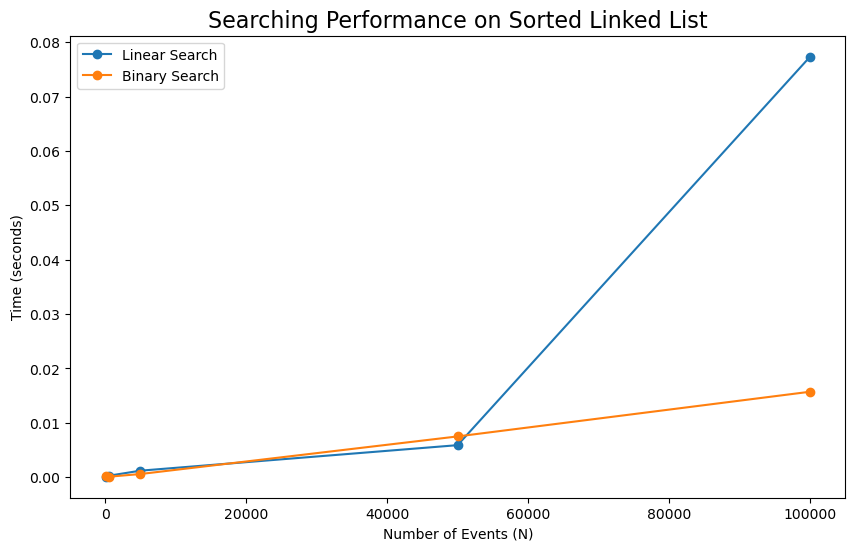

In [6]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

linked_list_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    linked_list = LinkedEventList()
    for i, data in enumerate(event_data):
        node = EventNode(**data)
        node.id = i+1
        linked_list.insert(node)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        try:
            search_data(linked_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            linked_list_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in linked_list_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Sorted Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Performance of Searching Algorithms using Sorted Data

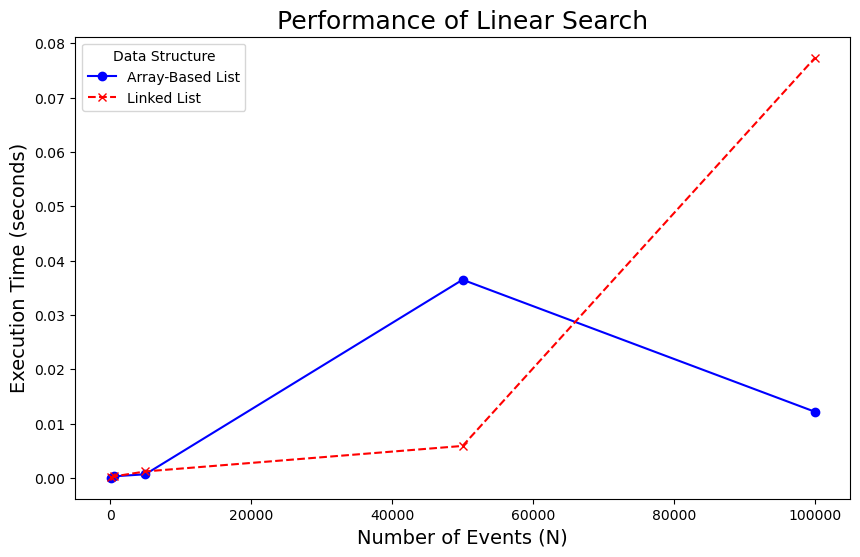

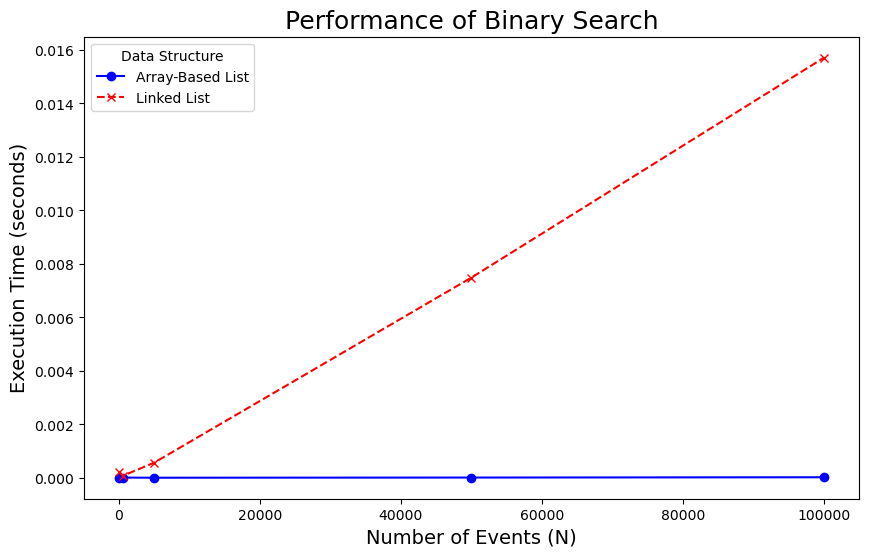

In [7]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Linear Search", "Binary Search"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 50000, 100000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 50000, 100000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo}", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Generating Unsorted Dummy Events

In [ ]:
"""
Since we need to sort the data before executing binary search, running
test for size more than 5000 will take a lot of time to finish executing
"""
size = [50, 500, 5000, 50000, 100000]
datasets = {}
target_id = {}

for n in size:
    datasets[n] = generate_events(n, sort = True)
    target_id[n] = random.randint(1,n)

Searching in Unsorted Array-Based-List


--- Testing size: 50 ---
  Linear Search took 0.0000 seconds.
  Binary Search took 0.0002 seconds.

--- Testing size: 500 ---
  Linear Search took 0.0000 seconds.
  Binary Search took 0.0023 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.0003 seconds.
  Binary Search took 0.0955 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.0045 seconds.
  Binary Search took 10.7554 seconds.


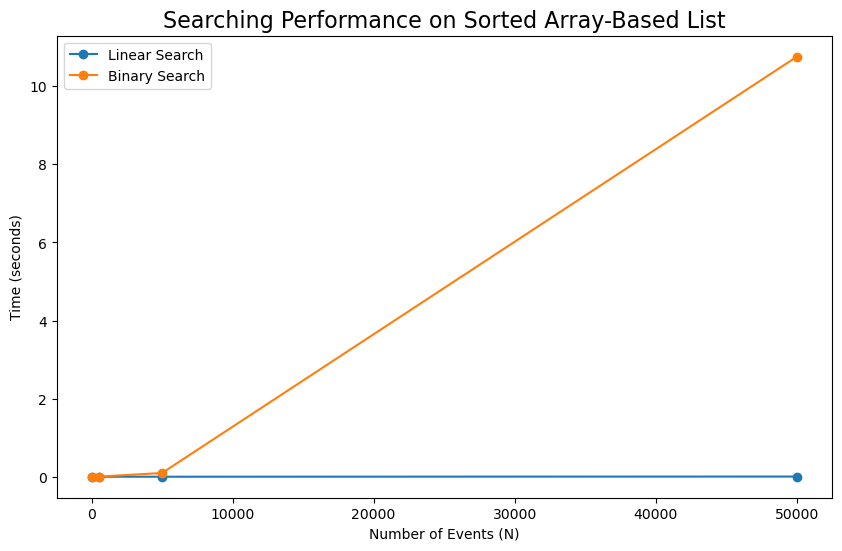

In [ ]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

array_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    event_list = EventList()
    for i, data in enumerate(event_data):
        event = Event(**data)
        event.id = i+1
        event_list.insert(event)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        if search_algo == SearchAlgorithm.BINARY:
            event_list = sort_data(event_list, 
                                   algorithm = SortingAlgorithm.MERGE, 
                                   attribute = "_id"
            )
        try:
            search_data(event_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            array_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in array_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Unsorted Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Searching in Unsorted Linked-List


--- Testing size: 50 ---
  Linear Search took 0.0000 seconds.
  Binary Search took 0.0020 seconds.

--- Testing size: 500 ---
  Linear Search took 0.0000 seconds.
  Binary Search took 0.0233 seconds.

--- Testing size: 5000 ---
  Linear Search took 0.0003 seconds.
  Binary Search took 0.6181 seconds.

--- Testing size: 50000 ---
  Linear Search took 0.0060 seconds.
  Binary Search took 38.8525 seconds.


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

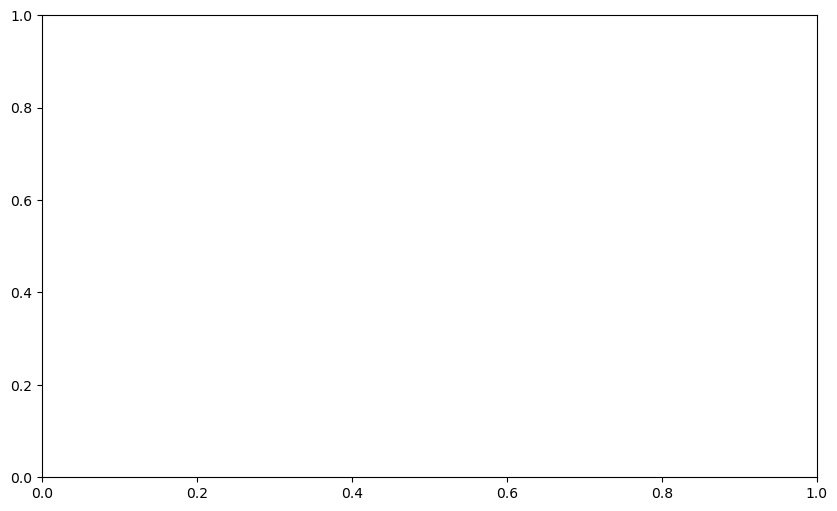

In [38]:
searches_to_test = {
    "Linear Search": SearchAlgorithm.LINEAR,
    "Binary Search": SearchAlgorithm.BINARY
}

linked_list_results = {name: [] for name in searches_to_test.keys()}

for n in size:
    print(f"\n--- Testing size: {n} ---")
    event_data = datasets[n]
    linked_list = LinkedEventList()
    for i, data in enumerate(event_data):
        node = EventNode(**data)
        node.id = i+1
        linked_list.insert(node)

    for search_name, search_algo in searches_to_test.items():
        start = time.time()
        if search_algo == SearchAlgorithm.BINARY:
            linked_list = sort_data(linked_list, 
                                    algorithm = SortingAlgorithm.MERGE, 
                                    attribute = "_id"
            )
        try:
            search_data(linked_list, 
                        target_id[n], 
                        algorithm=search_algo, 
                        attribute = '_id'
            )
            duration = time.time() - start
            array_results[search_name].append(duration)
            print(f"  {search_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {search_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for search_name, timings in linked_list_results.items():
    ax.plot(size, timings, marker='o', label=search_name)

ax.set_title('Searching Performance on Unsorted Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.legend()
plt.show()

Plotting Performance of Data Structures on Each Search Algorithm

In [ ]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Insertion Sort", "Merge Sort", "Quick Sort"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 10000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 10000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo}", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.legend(title="Data Structure")
    
    plt.show()

Part D: Scalability Challenge

1. Estimate memory usage for array vs linked list

When scaling to 1 million events, the memory taken by data structures becomes critical. The main difference between array and linked list is that linked list has overhead pointer which requries extra storage.

Let's estimate the memory usage of both data structures. For parent class Event, it's attributes (strings, integers, and datetime objects) contribute to roughly 150 bytes, so each event object will take 150 bytes of storage.

For array, the total storage it takes is 1 million events x 150 bytes which gives us total size of 150,000,000 bytes. One million bytes is roughly equals to 1 MB, therefore total storage taken by array for One million is 150 MB. 

For linked list, in addition to the space taken by event object, each object has a pointer which points to next object. Each of these pointer take roughly 8 byte in a modern 64 bit system. This takes total size taken by each event in linked list to 150 bytes + 8 bytes, which is equal to 158 bytes. For One million events, this is estimated to 158 MB.

For One million events, comparing to array, the linked list takes 8 MB more than array which is not relevant in modern systems. While not a huge difference, this shows that for raw data storage, the array is proven to be more memory-efficient that linked list.

2. Suggest optimizations (e.g., indexing, hybrid structures).



3. Sketch a design for parallel conflict detection (multi-core idea)

Part E: Teamwork

* Stephanie Bie: General prototyping & packaging, git & changelog maintenance, readme writeup, sorting algorithms implementation, unit testing

* Dnyanada Bhosale: Search algorithms implementation, performance analysis

* Augustine Joy: Event classes implementation, performance analysis